In [15]:
import json

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import datetime

with open("1.json") as f:
        
    tmp = json.load(f)
    
df = tmp['datapoints']

average = []

time = []

for i in range(len(df)):
    
    average.append(df[i]['average'])
    
    date = datetime.datetime.fromtimestamp(df[i]['timestamp']/1000.0)
    
    date = date.strftime('%Y-%m-%d %H:%M:%S')
    
    time.append(date)
    
table = pd.DataFrame({'average': average, 'timestamp': time})

print(table)

table.head()

        average            timestamp
0      90882.50  2018-11-02 23:00:00
1      92260.14  2018-11-02 23:05:00
2      95012.64  2018-11-02 23:10:00
3      93378.70  2018-11-02 23:15:00
4      91790.43  2018-11-02 23:20:00
...         ...                  ...
2011  102639.57  2018-11-09 22:40:00
2012  103824.09  2018-11-09 22:45:00
2013  103446.44  2018-11-09 22:50:00
2014  103504.86  2018-11-09 22:55:00
2015  103618.56  2018-11-09 23:00:00

[2016 rows x 2 columns]


,average,timestamp
0,90882.50,2018-11-02 23:00:00
1,92260.14,2018-11-02 23:05:00
2,95012.64,2018-11-02 23:10:00
3,93378.70,2018-11-02 23:15:00
4,91790.43,2018-11-02 23:20:00


In [98]:
import sys

from tqdm import tqdm

from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf

import statsmodels.tsa.api as smt

import statsmodels.api as sm

import scipy.stats as scs

from scipy.optimize import minimize

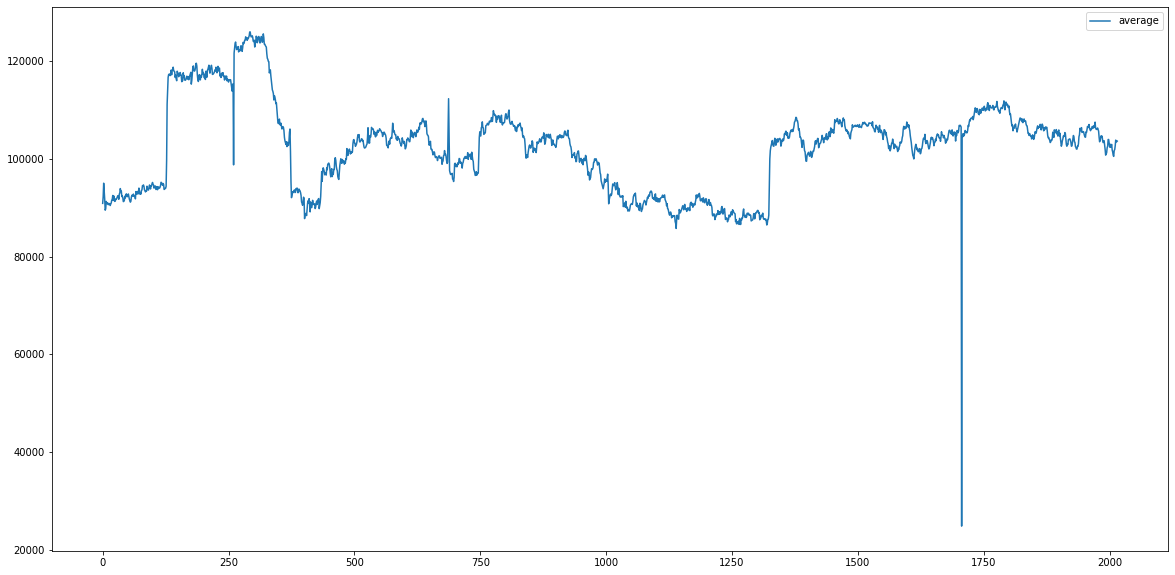

In [99]:

table.plot(figsize = (20,10))

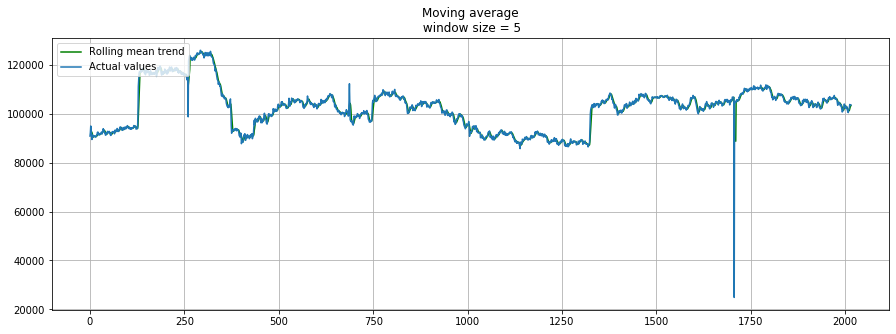

In [174]:
def plotMovingAverage(series, n):
    
    rolling_mean = series.rolling(window=n).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(series['average'], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    list_of_errors = [mean_squared_error(rolling_mean['average'][i:i+n], series['average'][i:i+n]) for i in range(n, len(table['average']))]
    return list_of_errors
MSE1 = plotMovingAverage(table,5)

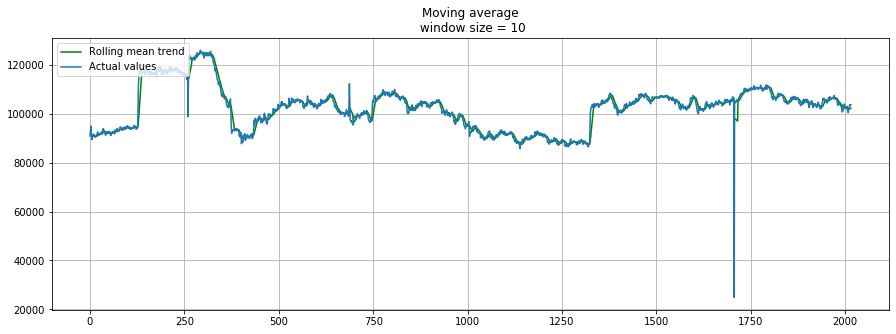

In [175]:
MSE2 = plotMovingAverage(table,10)

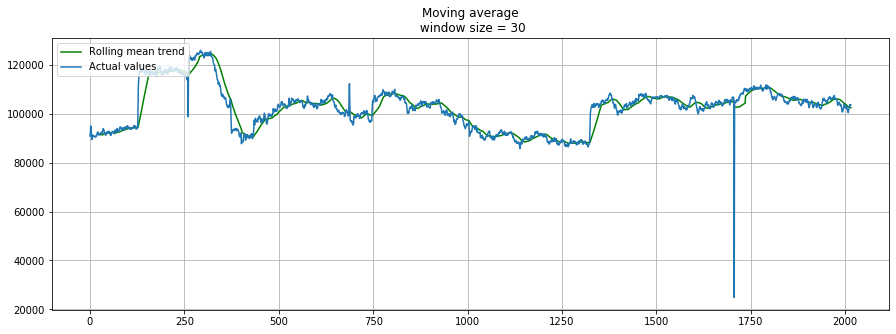

In [177]:
MSE3 = plotMovingAverage(table,30)

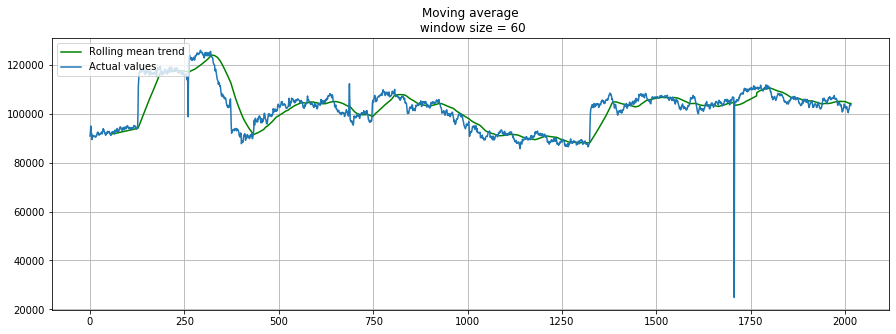

In [178]:
MSE4 = plotMovingAverage(table,60)

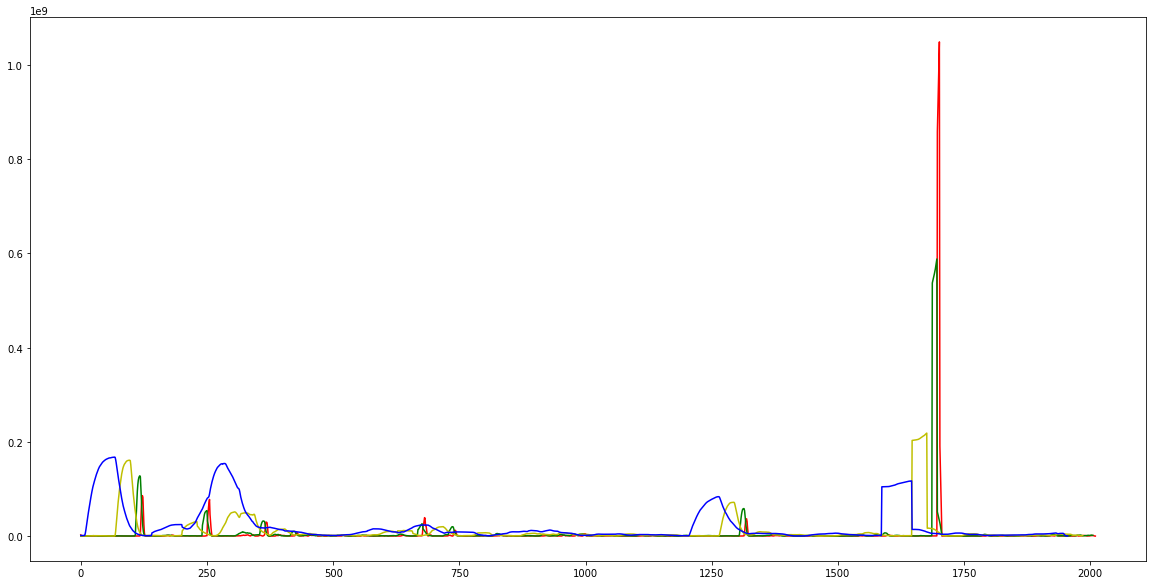

In [180]:
plt.figure(figsize=(20,10))
plt.plot(MSE1, "r")
plt.plot(MSE2, "g")
plt.plot(MSE3, "y")
plt.plot(MSE4, "b")

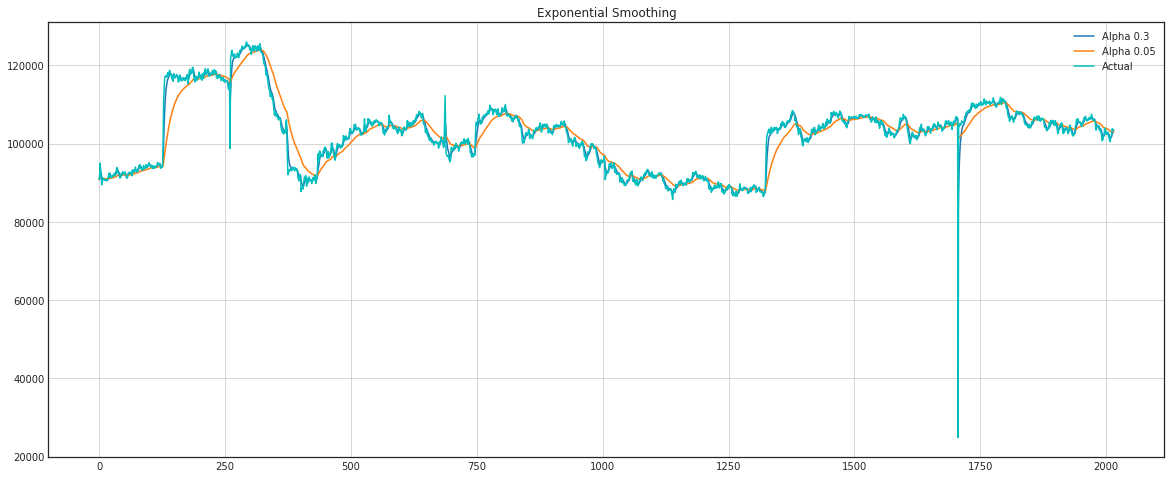

In [182]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result


with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.05]:
        plt.plot(exponential_smoothing(table['average'], alpha), label="Alpha {}".format(alpha))
    plt.plot(table['average'], "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

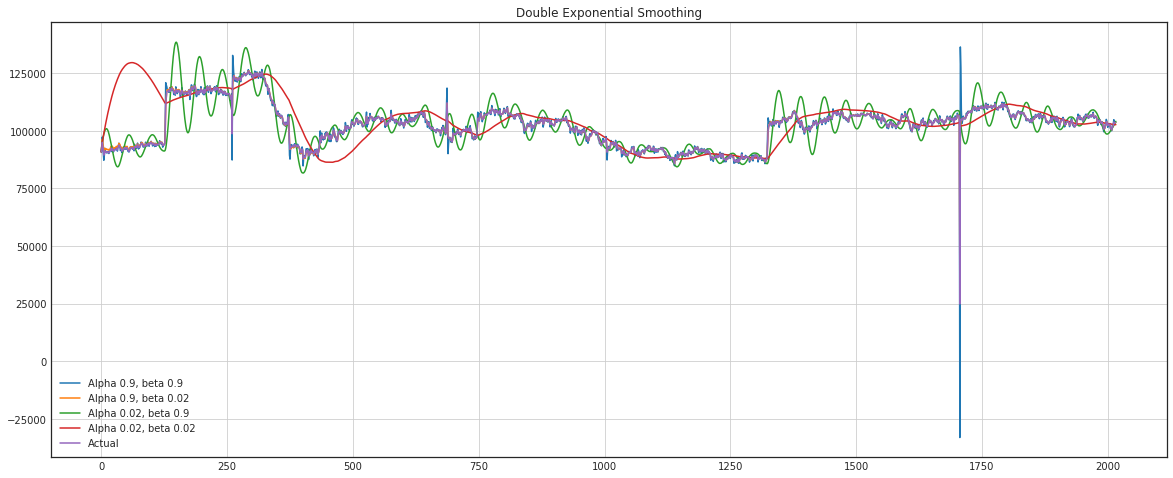

In [184]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series):
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(table['average'], alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(table['average'], label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

In [77]:
#взвешенное среднее

weights = np.arange(n)

table = pd.DataFrame({'average': average, 'timestamp': time})

weight = table['average'].rolling(n).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: average, dtype: float64

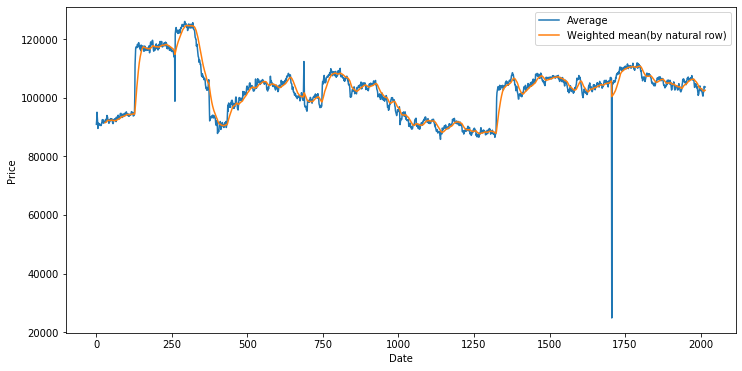

In [118]:

plt.figure(figsize = (12,6))

plt.plot(table['average'], label="Average")

plt.plot(weight, label="Weighted mean(by natural row)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()